In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [5]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size().unstack()
c = c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1,0
1940,1,0
1943,1,0
1948,0,1
1949,2,0


In [6]:
s = c.Superman - c.Batman
print("Superman Years")
print(len(s[s > 0]))

Superman Years
12


In [27]:
ct = cast
ct = ct[(ct.character == 'Superman') | (ct.character == 'Batman')]
ct = ct.groupby(['year', 'character']).size().unstack().fillna(0)
ct.head()

character,Batman,Superman
year,,
1938,1,0
1940,1,0
1943,1,0
1948,0,1
1949,2,0


In [29]:
ct = ct[ct.Superman > ct.Batman]
ct

character,Batman,Superman
year,,
1948,0,1
1950,0,1
1951,0,2
1954,0,5
1955,0,1
1973,1,2
1978,0,2
1980,0,2
1983,0,2


In [18]:
# b = cast
# b = b[(b.title == 'Superman')| (b.title == 'Batman')]
# b = b.groupby(['year', 'title']).size()
# b = b.unstack()


year  title   
1943  Batman       52
1948  Superman     63
1973  Superman     29
1978  Superman    104
1980  Superman      5
1987  Superman     19
1989  Batman       67
1997  Superman     15
dtype: int64

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [7]:
b = c.Batman - c.Superman
print("Batman Years")
print(len(b[b > 0]))

Batman Years
24


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

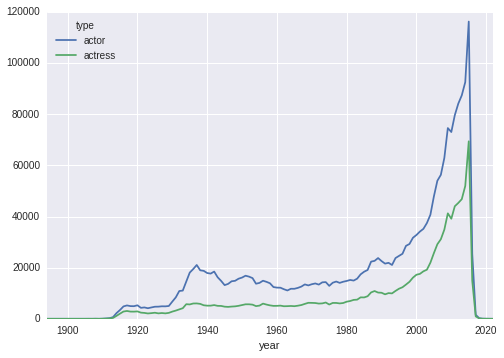

In [8]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type').fillna(0)
c.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

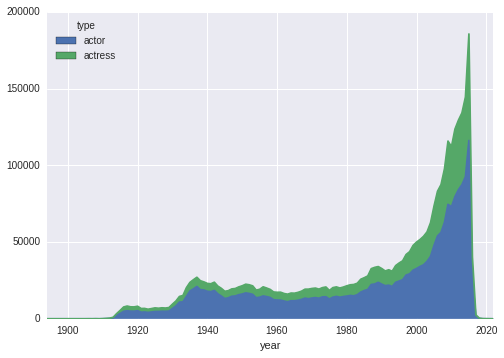

In [9]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type').fillna(0)
c.plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

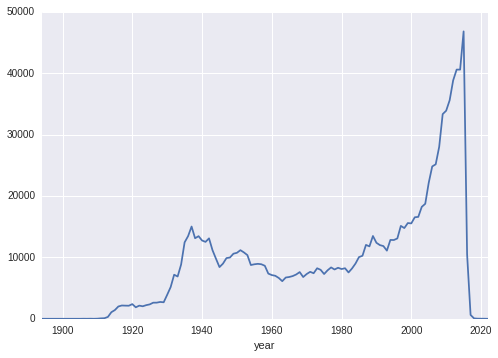

In [10]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type').fillna(0)
c = c.actor - c.actress
c.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

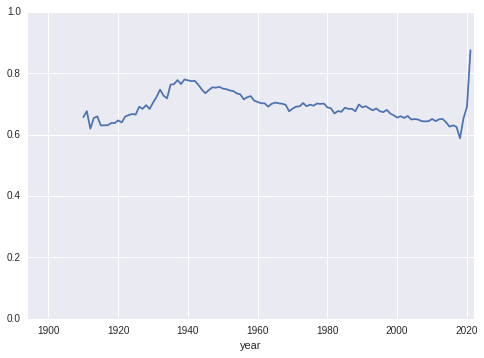

In [11]:
c = cast
c = c.groupby(['year', 'type']).size().unstack('type')
c = c.actor / (c.actor + c.actress)
c.plot(ylim = [0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

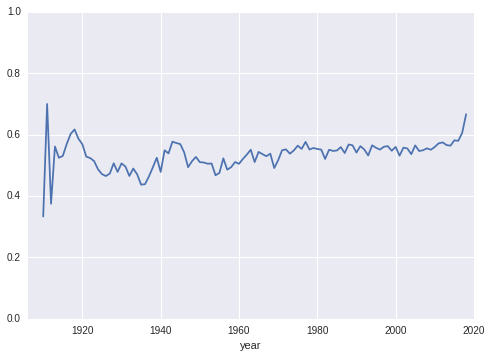

In [12]:
c = cast
c = c[c.n == 2]
c = c.groupby(['year', 'type']).size().unstack('type')
c = c.actor / (c.actor + c.actress)
c.plot(ylim = [0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

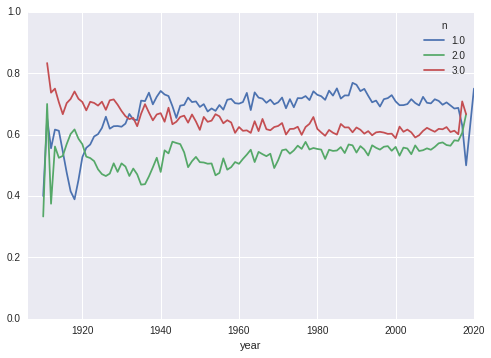

In [13]:
c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type')
c = c.actor / (c.actor + c.actress)
c = c.unstack('n')
c = c.plot(ylim = [0,1])
c